# scrap redddit data

In [ ]:
# install the library
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 5.1 MB/s eta 0:00:00


In [ ]:
# import libraries
import praw
import pandas as pd
import string

In [ ]:
# scrap relevant posts
ireddit = praw.Reddit(
   client_id="azA41zlPWODwbNZNxi061g",  # replace with your client id
   client_secret="5EZRn7-BdyFK3IBRfhwM_zxE40xE7A",  # replace with your client secret
   user_agent="Yobot/0.0.1"  # replace with your user agent name
)

# Define the search term
search_term = "king Charles III's coronation"

# Define the subreddit you want to search in
subreddit = ireddit.subreddit("all")  # searching in all subreddits

# Search for the term
posts = subreddit.search(search_term, limit=None)

# Prepare data for CSV
data = []
target_unix_timestamp = 1691625600  # Unix timestamp for August 10, 2023
for post in posts:
  if post.created_utc < target_unix_timestamp:  # Check post creation time
   data.append([post.created_utc, post.id, post.author, post.title, post.selftext, post.url, post.subreddit])

# Create DataFrame
df = pd.DataFrame(data, columns=["created_time", "id", "author", "title", "content", "url", "subreddit"])
df.head(5)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



,created_time,id,author,title,content,url,subreddit
0,1.677974e+09,11ihc48,Epistaxis,Holy anointing oil for King Charles III's coro...,,https://www.insider.com/king-charles-iiis-coro...,nottheonion
1,1.683281e+09,138gz6v,RandomWholesomeDude,Guiness has an outstanding advert for King Cha...,,https://i.redd.it/horp537421ya1.png,DesignPorn
2,1.683292e+09,138l86u,Aware-Impression8527,Prince Harry has landed in England for King Ch...,He flew from Van Nuys on a 20-seat private jet...,https://www.reddit.com/r/SaintMeghanMarkle/com...,SaintMeghanMarkle
3,1.683328e+09,1394ojo,Negative_Difference4,King Charles III Coronation: Megathread - Satu...,Sweet nods to patron Saint Meghan Markle and h...,https://www.reddit.com/r/BRF/comments/1394ojo/...,BRF
4,1.682858e+09,133o5q6,MaleficentBoot8911,What happened to the eco warrior prince of sel...,,https://archive.ph/aBtOk,SaintMeghanMarkle


In [ ]:
# extract crucial info
df1 = df[['created_time', 'id', 'title', 'content', 'subreddit']]
# Add the new column 'type' with the value 'posts'
df1['type'] = 'post'
# check the head of df
df1.head(5)

<ipython-input-4-fdda064d7e66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['type'] = 'post'


,created_time,id,title,content,subreddit,type
0,1.677974e+09,11ihc48,Holy anointing oil for King Charles III's coro...,,nottheonion,post
1,1.683281e+09,138gz6v,Guiness has an outstanding advert for King Cha...,,DesignPorn,post
2,1.683292e+09,138l86u,Prince Harry has landed in England for King Ch...,He flew from Van Nuys on a 20-seat private jet...,SaintMeghanMarkle,post
3,1.683328e+09,1394ojo,King Charles III Coronation: Megathread - Satu...,Sweet nods to patron Saint Meghan Markle and h...,BRF,post
4,1.682858e+09,133o5q6,What happened to the eco warrior prince of sel...,,SaintMeghanMarkle,post


In [ ]:
# Convert column names to a list
column_names_list = df1.columns.tolist()

# Displaying the column names as a list
print(column_names_list) # check


['created_time', 'id', 'title', 'content', 'subreddit', 'type']


In [ ]:
df1['text'] = df1['title'] + ' ' + df1['content']

# Create df with 'created_time' and 'text' columns
df2 = df1[['created_time', 'id', 'text', 'type', 'subreddit']].copy()
df2.rename(columns={ 'created_time': 'date'}, inplace=True)

# Display the head of df to verify the result
df2.head(5)

,date,id,text,type,subreddit
0,1.677974e+09,11ihc48,Holy anointing oil for King Charles III's coro...,post,nottheonion
1,1.683281e+09,138gz6v,Guiness has an outstanding advert for King Cha...,post,DesignPorn
2,1.683292e+09,138l86u,Prince Harry has landed in England for King Ch...,post,SaintMeghanMarkle
3,1.683328e+09,1394ojo,King Charles III Coronation: Megathread - Satu...,post,BRF
4,1.682858e+09,133o5q6,What happened to the eco warrior prince of sel...,post,SaintMeghanMarkle


In [ ]:
num_rows = len(df2)
num_rows #check

239

In [ ]:
# scrape comments of the posts
ireddit = praw.Reddit(
   client_id="azA41zlPWODwbNZNxi061g",  # replace with your client id
   client_secret="5EZRn7-BdyFK3IBRfhwM_zxE40xE7A",  # replace with your client secret
   user_agent="Yobot/0.0.1"  # replace with your user agent name
)

# Define the search term
search_term = "king Charles III's coronation"

# Define the subreddit you want to search in
subreddit = ireddit.subreddit("all")  # searching in all subreddits

# Search for the term
posts = subreddit.search(search_term, limit=500)

# Prepare data for CSV
data = []
target_unix_timestamp = 1691625600  # Unix timestamp for August 10, 2023
for post in posts:
  if post.created_utc < target_unix_timestamp:
    post.comments.replace_more(limit=0)  # This line of code expands the submission's comment forest with all MoreComments removed.
    for comment in post.comments.list():
        data.append([comment.created_utc, str(comment.author), comment.body, post.subreddit])

# Create DataFrame
df3 = pd.DataFrame(data, columns=["comment_time", "id", "comments", "subreddit"])
df3.head(5)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,comment_time,id,comments,subreddit
0,1.677974e+09,mugsimo,"Well, then I'm not going.",nottheonion
1,1.677978e+09,janesimsten,"> The BBC also reports that the new oil, predo...",nottheonion
2,1.677976e+09,apple-masher,"An explanation: \n\nThe ""intestinal wax"" they ...",nottheonion
3,1.677974e+09,random-comment-drop,Not holy then. God demands whale and civit jui...,nottheonion
4,1.677974e+09,squirrelblender,WE’EL MAKE OUR OWN ANOINTING OIL. \nWITH BLACK...,nottheonion


In [ ]:
# Convert column names to a list
#column_names_list = df2.columns.tolist()

# Displaying the column names as a list
#print(column_names_list)



In [ ]:
# extract columns and check the head of df
df3.rename(columns={'comments': 'text','commenter_id': 'id', 'comment_time': 'date'}, inplace=True)
# Add the new column 'type' with the value 'posts'
df3['type'] = 'comment'
df3.head(5)

,date,id,text,subreddit,type
0,1.677974e+09,mugsimo,"Well, then I'm not going.",nottheonion,comment
1,1.677978e+09,janesimsten,"> The BBC also reports that the new oil, predo...",nottheonion,comment
2,1.677976e+09,apple-masher,"An explanation: \n\nThe ""intestinal wax"" they ...",nottheonion,comment
3,1.677974e+09,random-comment-drop,Not holy then. God demands whale and civit jui...,nottheonion,comment
4,1.677974e+09,squirrelblender,WE’EL MAKE OUR OWN ANOINTING OIL. \nWITH BLACK...,nottheonion,comment


In [ ]:
num_rows = len(df3)
num_rows #check number of entries

27461

In [ ]:
# Concatenate the two DataFrames vertically and reset the index
df4 = pd.concat([df2, df3], ignore_index=True)
# Display the head of the merged df
df4.head()

,date,id,text,type,subreddit
0,1.677974e+09,11ihc48,Holy anointing oil for King Charles III's coro...,post,nottheonion
1,1.683281e+09,138gz6v,Guiness has an outstanding advert for King Cha...,post,DesignPorn
2,1.683292e+09,138l86u,Prince Harry has landed in England for King Ch...,post,SaintMeghanMarkle
3,1.683328e+09,1394ojo,King Charles III Coronation: Megathread - Satu...,post,BRF
4,1.682858e+09,133o5q6,What happened to the eco warrior prince of sel...,post,SaintMeghanMarkle


In [ ]:
num_rows = len(df4)
num_rows # check

27700

In [ ]:
# Convert the 'created time' column to datetime objects, with the unit set to seconds
df4['date'] = pd.to_datetime(df4['date'], unit='s')


In [ ]:
# Format the datetime objects as 'dd-mm-yyyy'
df4['date'] = df4['date'].dt.strftime('%d/%m/%Y')

In [ ]:
# Shuffle the DataFrame and reset the index
df4 = df4.sample(frac=1, replace=False, random_state=42).reset_index(drop=True)

In [ ]:
df4.head(5) #check

,date,id,text,type,subreddit
0,06/05/2023,NotDaveBut,I smell Harry behind this,comment,news
1,06/05/2023,PPvsFC_,Where tf are the Waleses?,comment,RoyalsGossip2
2,21/03/2023,classicalySarcastic,What's the metric equivalent of a New York Sec...,comment,todayilearned
3,06/05/2023,IndigoButterfl6,I don't entirely disagree but all monarchies a...,comment,popculturechat
4,04/05/2023,RedStar9117,One of the Koch bros is dead,comment,politics


In [ ]:
# Check for missing values in the dataset
missing_values = df4.isnull().sum()
missing_values


date         0
id           0
text         0
type         0
subreddit    0
dtype: int64

In [ ]:
# Remove duplicates based on the 'id' column
df4 = df4.drop_duplicates(subset='id')

# Optional: Reset the index if you want
df4.reset_index(drop=True, inplace=True)

In [ ]:
# check the size of the merged dataframe
num_rows = len(df4)
num_rows

16076

In [ ]:
df4.head()

,date,id,text,type,subreddit
0,06/05/2023,NotDaveBut,I smell Harry behind this,comment,news
1,06/05/2023,PPvsFC_,Where tf are the Waleses?,comment,RoyalsGossip2
2,21/03/2023,classicalySarcastic,What's the metric equivalent of a New York Sec...,comment,todayilearned
3,06/05/2023,IndigoButterfl6,I don't entirely disagree but all monarchies a...,comment,popculturechat
4,04/05/2023,RedStar9117,One of the Koch bros is dead,comment,politics


In [ ]:
# check the data
df4.to_csv('reddit_data.csv', index=False,encoding='utf-8')

In [ ]:
# check
from google.colab import files

files.download('reddit_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
num_posts = df4['type'].value_counts()['post']
num_posts

239

In [ ]:
num_comments = df4['type'].value_counts()['comment']
num_comments

15837

# data cleaning

In [ ]:
# install libraries for pre-processing the data
!pip install contractions
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 7.4 MB/s eta 0:00:00


In [ ]:
# import libraries
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus.reader.wordnet import NOUN, VERB, ADJ, ADV
import emoji

In [ ]:
# Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Getting the list of stopwords
stop_words = set(stopwords.words('english'))
# Initializing the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Function to map POS tag to first character used by WordNetLemmatizer
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return ADJ
    elif treebank_tag.startswith('V'):
        return VERB
    elif treebank_tag.startswith('N'):
        return NOUN
    elif treebank_tag.startswith('R'):
        return ADV
    else:
        return NOUN # Default to noun

In [ ]:
# Function to clean the text using NLTK, convert emojis to words, and perform lemmatization
def clean_text_nltk(text):
    # Converting emojis to words
    text = emoji.demojize(text)
    # Removing special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenizing the text
    tokens = word_tokenize(text)
    # POS tagging
    pos_tags = nltk.pos_tag(tokens)
    # Lemmatizing with POS tag, removing stopwords
    lemmatized_tokens = [lemmatizer.lemmatize(word.lower(), get_wordnet_pos(pos)) if word.lower() not in stop_words else '' for word, pos in pos_tags]
    # Joining the cleaned tokens back into a single string
    cleaned_text = ' '.join(lemmatized_tokens).strip()
    return cleaned_text

In [ ]:
# Applying the clean_text_nltk function to the 'text' column
df4['text'] = df4['text'].apply(clean_text_nltk)

In [ ]:
df4.head()

,date,id,text,type,subreddit
0,06/05/2023,NotDaveBut,smell harry behind,comment,news
1,06/05/2023,PPvsFC_,tf wales,comment,RoyalsGossip2
2,21/03/2023,classicalySarcastic,whats metric equivalent new york second any...,comment,todayilearned
3,06/05/2023,IndigoButterfl6,dont entirely disagree monarchy arent den...,comment,popculturechat
4,04/05/2023,RedStar9117,one koch bros dead,comment,politics


In [ ]:
# check scale of the df
num_rows = len(df4)
num_rows

16076

In [ ]:
# Displaying random samples from the cleaned data
random_samples = df4.sample(10)
print(random_samples['text'])

# Checking for missing or null values in the text column
missing_values = df4['text'].isnull().sum()
print(f"Number of missing values in the text column: {missing_values}")

2065     tell republican protest   proclamation   charl...
12530    zelensky go   western mass appeal feel  get  s...
1344     contribute   systemthen   get benefit   system...
8583                               gifgiphyhduiokugxrrkkll
11522    op  another canadian   constitutional monarchy...
1408                                    still sound  alien
5889     would   funny    send  invite  tell  sorry you...
5040      king    d  aint german anyways  article go wrong
15005                                                 head
369        harry look  lose    place tbh anne look amazing
Name: text, dtype: object
Number of missing values in the text column: 0


In [ ]:
newdf = df4.copy()
newdf.head()
# When ploting 'polarity trends over time', the date column of the df5 would be changed
# The newdf used for further analysis

,date,id,text,type,subreddit
0,06/05/2023,NotDaveBut,smell harry behind,comment,news
1,06/05/2023,PPvsFC_,tf wales,comment,RoyalsGossip2
2,21/03/2023,classicalySarcastic,whats metric equivalent new york second any...,comment,todayilearned
3,06/05/2023,IndigoButterfl6,dont entirely disagree monarchy arent den...,comment,popculturechat
4,04/05/2023,RedStar9117,one koch bros dead,comment,politics


# Sentiment analysis

In [ ]:
# top 30 subreddits with most posts
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Subreddit' objects to their string representation
df4['subreddit'] = df4['subreddit'].astype(str)
# Filter rows where type is 'posts'
posts_df = df4[df4['type'] == 'post'].reset_index(drop=True)
posts_df.head()

,date,id,text,type,subreddit
0,29/04/2023,1333ew5,irish language use coronation king charles...,post,ireland
1,06/05/2023,139mc2n,foreign royal coronation king charles iii ...,post,popculturechat
2,04/05/2023,1383vub,time king charles iii coronation watch au...,post,ABCaus
3,06/05/2023,139szr0,hull east yorkshire mark king charles iii cor...,post,Hull
4,01/03/2023,11f3ots,turn request sing king charles iii coronation,post,Britain


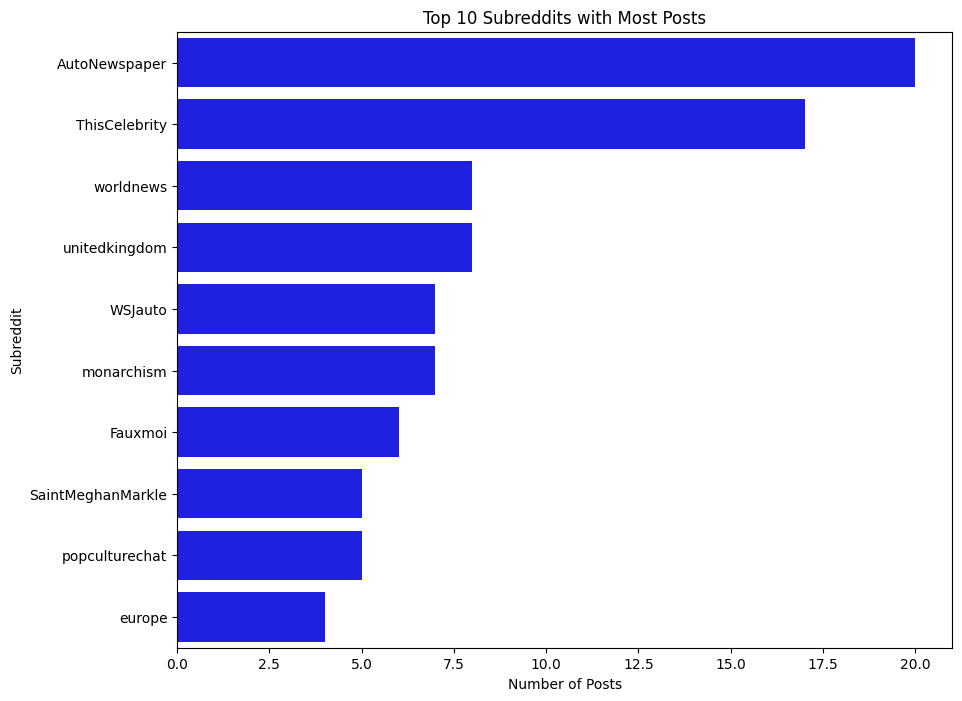

In [ ]:
# Count the number of posts in each subreddit
subreddit_counts = posts_df['subreddit'].value_counts()

# Select top  subreddits with most posts
top_10_subreddits = subreddit_counts.nlargest(10)

# Create a horizontal bar plot of the subreddit counts
plt.figure(figsize=(10,8))
sns.barplot(x=top_10_subreddits.values, y=top_10_subreddits.index, color='b')

# Set plot title and labels
plt.title('Top 10 Subreddits with Most Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')

# Show the plot
plt.show()

In [ ]:
# Importing the VADER library for sentiment analysis
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment label based on the compound score
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Calculate the polarity score and sentiment label for each text entry
df4['polarity'] = df4['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df4['sentiment'] = df4['polarity'].apply(get_sentiment_label)

# Preview the data with new columns
df4.head()

,date,id,text,type,subreddit,polarity,sentiment
0,06/05/2023,NotDaveBut,smell harry behind,comment,news,0.0000,Neutral
1,06/05/2023,PPvsFC_,tf wales,comment,RoyalsGossip2,0.0000,Neutral
2,21/03/2023,classicalySarcastic,whats metric equivalent new york second any...,comment,todayilearned,0.0000,Neutral
3,06/05/2023,IndigoButterfl6,dont entirely disagree monarchy arent den...,comment,popculturechat,0.3401,Positive
4,04/05/2023,RedStar9117,one koch bros dead,comment,politics,-0.6486,Negative


In [ ]:
# import the required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# sentiment distribution
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get the sentiment label based on the compound score
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Calculate the polarity score and sentiment label for each text entry
newdf['polarity'] = newdf['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
newdf['sentiment'] = newdf['polarity'].apply(get_sentiment_label)

# Display the distribution of sentiments
sentiment_distribution = newdf['sentiment'].value_counts()
sentiment_percentage = sentiment_distribution / sentiment_distribution.sum()*100
sentiment_percentage


Positive    41.260264
Neutral     33.671311
Negative    25.068425
Name: sentiment, dtype: float64

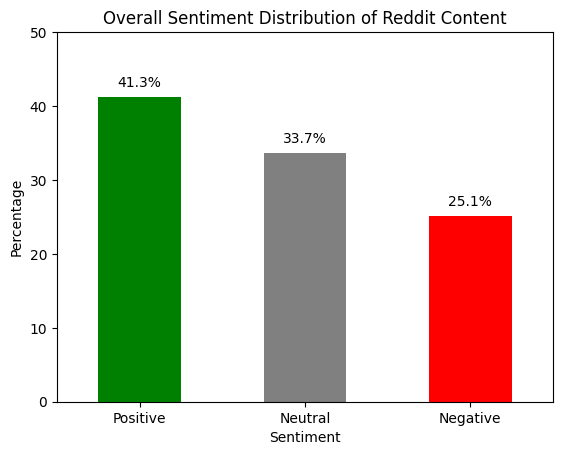

In [ ]:
# Plotting the distribution of sentiments
ax = sentiment_percentage.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Overall Sentiment Distribution of Reddit Content')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
# Setting Y-axis limits
plt.ylim(0, 50)
# Annotate the bars with percentages
for i, percentage in enumerate(sentiment_percentage):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()


In [ ]:
# Comparison pie charts
sentiment_by_post_type = newdf.groupby(['type', 'sentiment']).size().unstack().fillna(0)

# Converting counts to proportions
sentiment_by_post_type_proportions = sentiment_by_post_type.div(sentiment_by_post_type.sum(axis=1), axis=0)

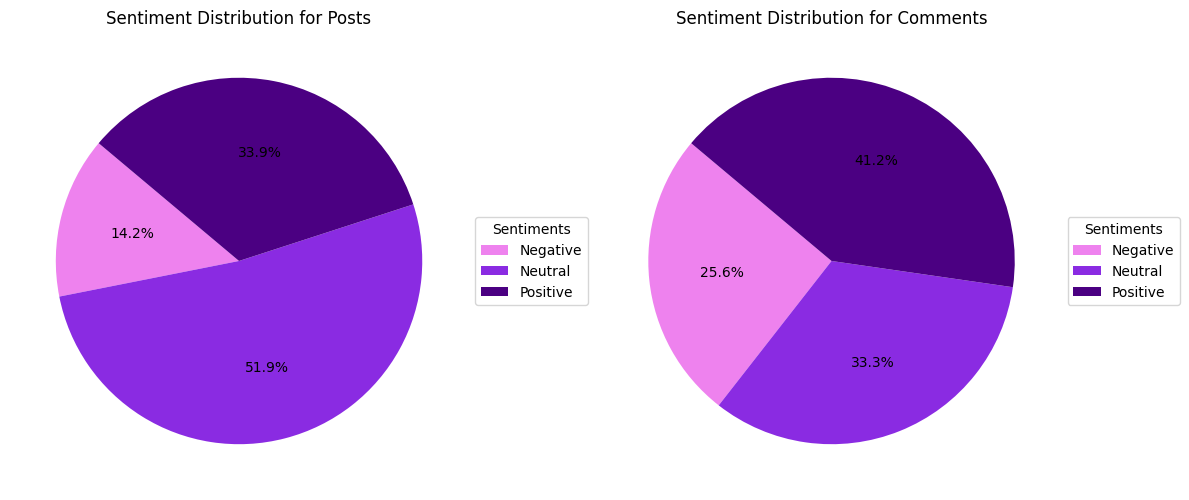

In [ ]:
# Sample color schemes
classic_colors = ['#EE82EE', '#8A2BE2', '#4B0082']

# Add legends back to pie charts with the Classic color scheme
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Pie chart for "post" type
axes[0].pie(
    sentiment_by_post_type_proportions.loc['post'],
    autopct='%1.1f%%',
    startangle=140,
    colors=classic_colors  # Change this to cool_colors or warm_colors if you prefer
)
axes[0].set_title('Sentiment Distribution for Posts')

# Add legend with labels to describe Positive, Negative, and Neutral sentiment
axes[0].legend(sentiment_by_post_type_proportions.columns,
          title="Sentiments",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Pie chart for "comment" type
axes[1].pie(
    sentiment_by_post_type_proportions.loc['comment'],
    autopct='%1.1f%%',
    startangle=140,
    colors=classic_colors  # Change this to cool_colors or warm_colors if you prefer
)
axes[1].set_title('Sentiment Distribution for Comments')

# Add legend with labels to describe Positive, Negative, and Neutral sentiment
axes[1].legend(sentiment_by_post_type_proportions.columns,
          title="Sentiments",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.tight_layout()
plt.show()


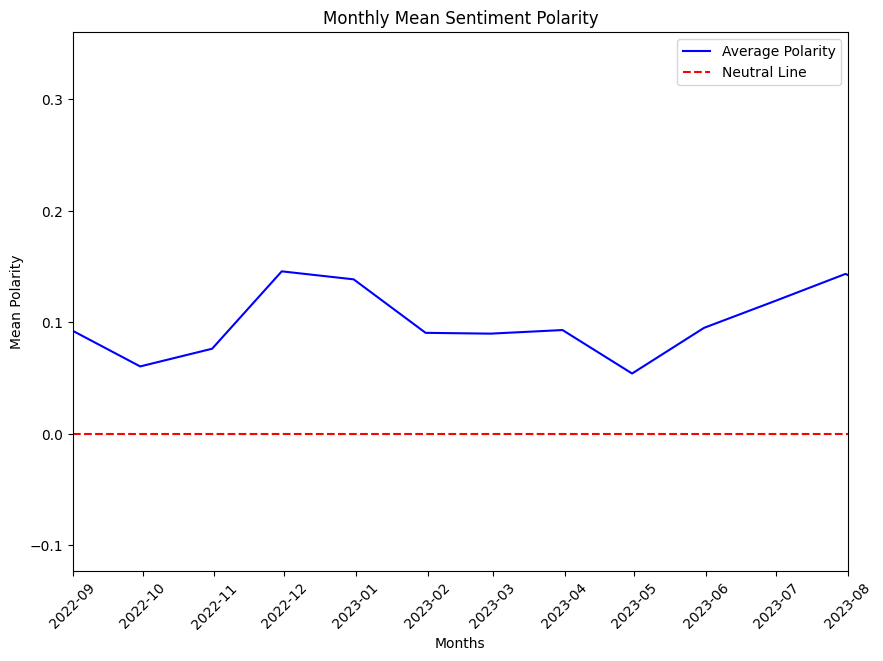

In [ ]:
# polarity trends over time
# Resetting the index and ensuring the 'date' column is in datetime format
df4.reset_index(inplace=True)
df4['date'] = pd.to_datetime(df4['date'])

# Setting the date column as the index for resampling
df4.set_index('date', inplace=True)

# Resampling the data for monthly periods and calculating the mean polarity
polarity_monthly = df4['polarity'].resample('M').mean().reset_index()

# Plotting the monthly polarity over time
plt.figure(figsize=(10, 7))
sns.lineplot(x='date', y='polarity', data=polarity_monthly, color='blue', label='Average Polarity')
plt.title('Monthly Mean Sentiment Polarity')
plt.xlabel('Months')
plt.ylabel('Mean Polarity')
plt.axhline(0, color='red', linestyle='--', label='Neutral Line')
plt.xlim(left=pd.Timestamp('2022-09'), right=pd.Timestamp('2023-08'))
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [ ]:
# Applying the clean_text_nltk function to the 'text' column
newdf['text'] = newdf['text'].apply(clean_text_nltk)
newdf.head()

,date,id,text,type,subreddit,polarity,sentiment
0,06/05/2023,NotDaveBut,smell harry behind,comment,news,0.0000,Neutral
1,06/05/2023,PPvsFC_,tf wale,comment,RoyalsGossip2,0.0000,Neutral
2,21/03/2023,classicalySarcastic,whats metric equivalent new york second anyways,comment,todayilearned,0.0000,Neutral
3,06/05/2023,IndigoButterfl6,dont entirely disagree monarchy arent denmark ...,comment,popculturechat,0.3401,Positive
4,04/05/2023,RedStar9117,one koch bros dead,comment,politics,-0.6486,Negative


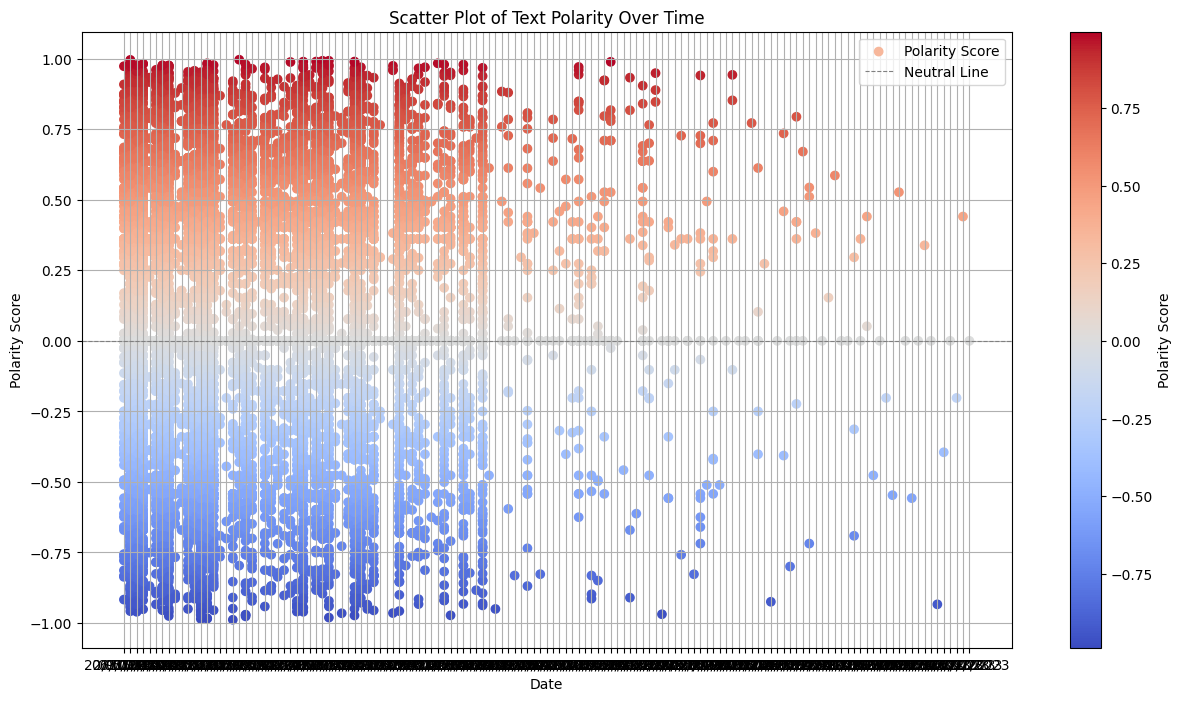

In [ ]:
## Backup plot (not for use in project report)
# Create scatter plot for polarity over time with neutral line and dots
plt.figure(figsize=(15, 8))
plt.scatter(newdf['date'], newdf['polarity'],
       c=newdf['polarity'], cmap='coolwarm', label='Polarity Score', marker='o')
plt.colorbar().set_label('Polarity Score')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Neutral Line')  # Add neutral line
plt.xlabel('Date')
plt.ylabel('Polarity Score')
plt.title('Scatter Plot of Text Polarity Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#type(newdf['text'])

pandas.core.series.Series

<ipython-input-55-0c5c14d65449>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  newdf['date'] = pd.to_datetime(newdf['date'])


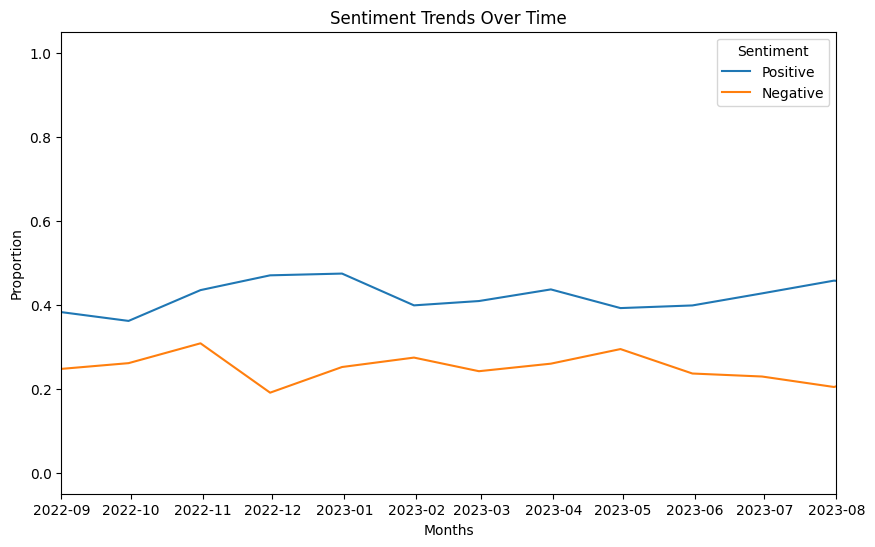

In [ ]:
# sentiment trends over time backup
# Convert 'date' column to datetime type
newdf['date'] = pd.to_datetime(newdf['date'])

# Filtering the data to include entries only up to August 2023
data = newdf[newdf['date'] <= '2023-08-10']

# Resample the filtered data by month and calculate sentiment proportions
sentiment_trends_by_month = data.groupby(pd.Grouper(key='date', freq='M'))['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Plotting the sentiment trends over time
plt.figure(figsize=(10, 6))
plt.plot(sentiment_trends_by_month.index, sentiment_trends_by_month['Positive'], label='Positive')
#plt.plot(sentiment_trends_by_month.index, sentiment_trends_by_month['Neutral'], label='Neutral')
plt.plot(sentiment_trends_by_month.index, sentiment_trends_by_month['Negative'], label='Negative')
plt.title('Sentiment Trends Over Time')
# Custom tick locations and labels for x-axis
plt.xlim(left=pd.Timestamp('2022-09'), right=pd.Timestamp('2023-08'))
plt.xlabel('Months')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
# check the data
newdf.to_csv('sentiment.csv', index=False,encoding='utf-8')

In [ ]:
# check
from google.colab import files

files.download('sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# comparative analysis
# Function to categorize posts and comments based on mentions of specific royal family members
def categorize_royal_mentions(text):
    mentions = ["charles", "camilla", "harry", "meghan", "william", "kate", "diana"]
    for mention in mentions:
        if mention in text.lower():
            return mention.capitalize()
    return "Others"

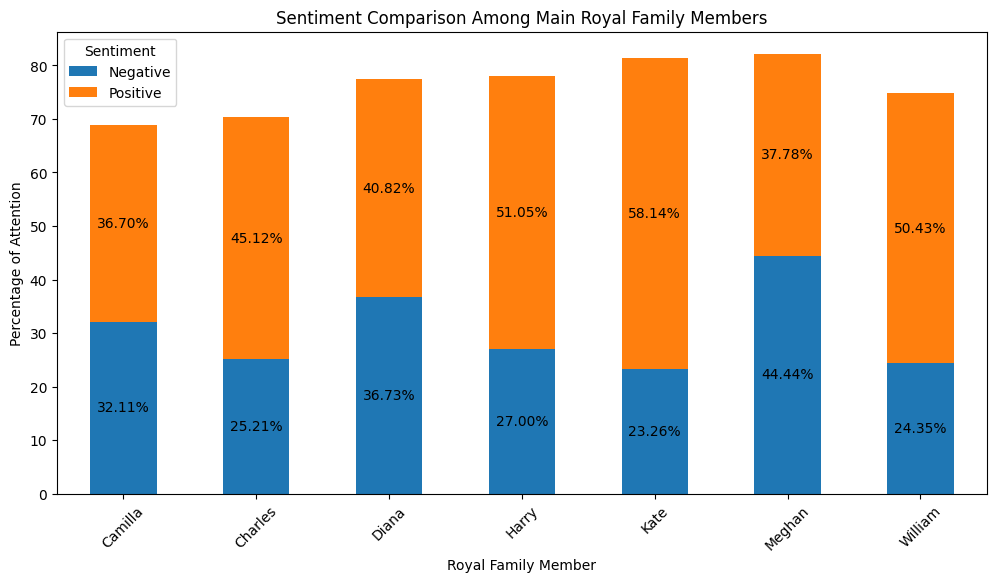

In [ ]:
# Classifying sentiment
# Reapplying the categorization to the data
newdf['royal_mention'] = newdf['text'].apply(categorize_royal_mentions)

# Re-filtering data to include only posts and comments mentioning specific royal family members
royal_family_mentions_extended = newdf[newdf['royal_mention'] != 'Others']

# Re-analyzing sentiment distribution for mentions of specific royal family members
sentiment_comparison_extended = royal_family_mentions_extended.groupby('royal_mention')['sentiment'].value_counts().unstack().fillna(0)

# Calculate the total mentions for each royal family member
total_mentions = sentiment_comparison_extended.sum(axis=1)

# Calculate the percentage for each sentiment category
sentiment_percentage_extended = (sentiment_comparison_extended.T / total_mentions).T * 100

# Remove the 'Neutral' column from the sentiment percentage dataframe
if 'Neutral' in sentiment_percentage_extended.columns:
    sentiment_percentage_extended.drop('Neutral', axis=1, inplace=True)

# Re-plot the sentiment comparison for specific royal family members without the 'Neutral' category
ax = sentiment_percentage_extended.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Comparison Among Main Royal Family Members')
plt.xlabel('Royal Family Member')
plt.ylabel('Percentage of Attention')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height != 0:
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

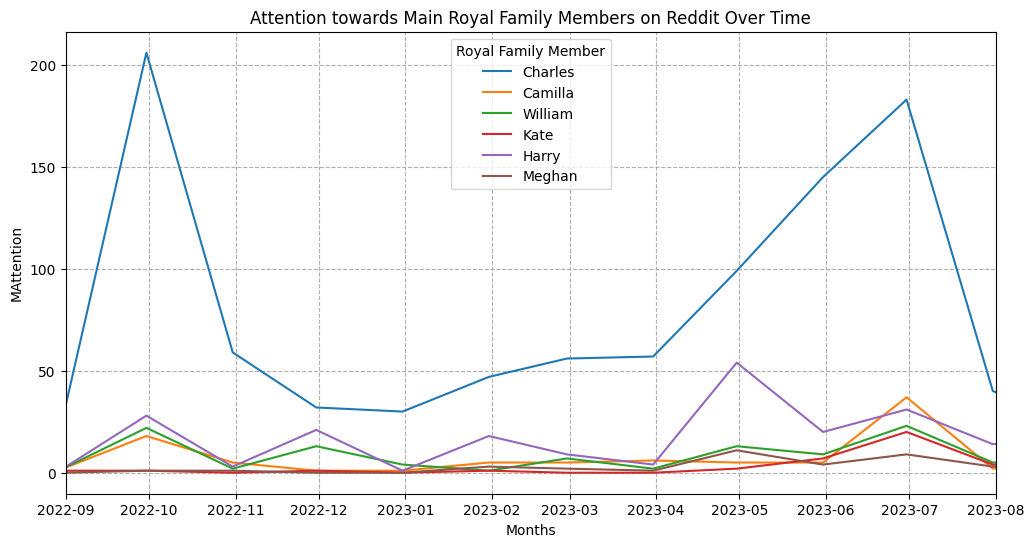

In [ ]:
# List of famous royal family members to compare
famous_royals = ['Charles', 'Camilla', 'William', 'Kate', 'Harry', 'Meghan']

# Ensure the 'date' column is of datetime type
#newdf['date'] = pd.to_datetime(newdf['date'], errors='coerce')

# Filter data to include only posts and comments mentioning the famous royal family members
famous_royals_mentions = newdf[newdf['royal_mention'].isin(famous_royals)]

# Setting the 'date' column as the index
famous_royals_mentions.set_index('date', inplace=True)

# Resampling by month and counting mentions for each royal family member
popularity_trends = famous_royals_mentions.groupby([pd.Grouper(freq='M'), 'royal_mention']).size().unstack().fillna(0)

# Plotting the popularity trends over time
plt.figure(figsize=(12, 6))
for royal in famous_royals:
    if royal in popularity_trends.columns: # Ensure the royal member is present in the data
        plt.plot(popularity_trends.index, popularity_trends[royal], label=royal)
plt.title('Attention towards Main Royal Family Members on Reddit Over Time')
plt.xlabel('Months')
plt.ylabel('MAttention')
plt.xlim(left=pd.Timestamp('2022-09'), right=pd.Timestamp('2023-08'))
plt.legend(title='Royal Family Member')
plt.grid(True, linestyle='--')
plt.show()



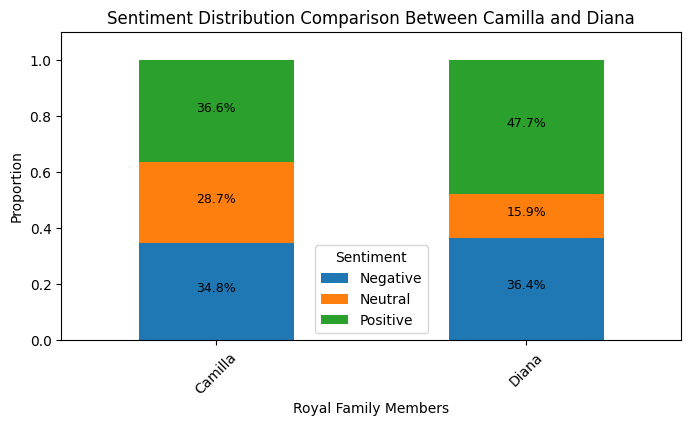

In [ ]:
import matplotlib.pyplot as plt

# Function to plot sentiment comparison with proportions and annotations
def plot_sentiment_proportions(members, title):
    comparison_data = sentiment_comparison_extended.loc[members]
    # Convert counts to proportions
    comparison_data_proportions = comparison_data.div(comparison_data.sum(axis=1), axis=0)
    ax = comparison_data_proportions.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(title)
    plt.xlabel('Royal Family Members')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.ylim(0, 1.1) # Adjusting y limit for annotations
    plt.legend(title='Sentiment')

    # Adding annotations for proportions as percentages
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0: # Only annotate if height is positive
            proportion_percent = height * 100
            ax.annotate(f'{proportion_percent:.1f}%', (x + width/2, y + height/2), ha='center', fontsize=9)

    plt.show()

# Re-plotting sentiment comparisons with proportions and annotations
plot_sentiment_proportions(['Camilla', 'Diana'], 'Sentiment Distribution Comparison Between Camilla and Diana')

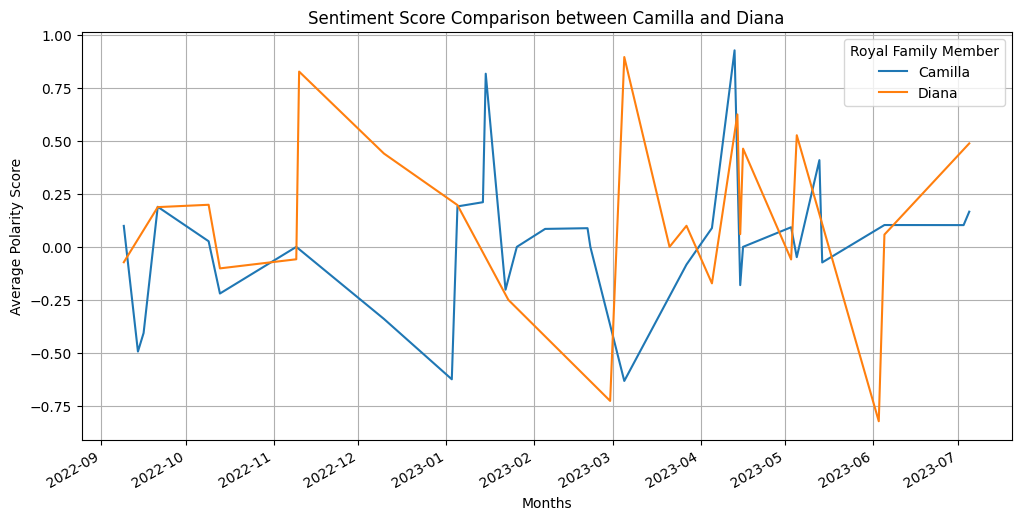

In [ ]:
import matplotlib.dates as mdates

# Filter the data to only include mentions of Camilla and Diana
camilla_diana_df = royal_family_mentions_extended[royal_family_mentions_extended['royal_mention'].isin(['Camilla', 'Diana'])]

# Convert the 'date' column to datetime format
camilla_diana_df['date'] = pd.to_datetime(camilla_diana_df['date'])

# Group the data by date and royal mention, then calculate the mean polarity
grouped_polarity = camilla_diana_df.groupby(['date', 'royal_mention'])['polarity'].mean().reset_index()

# Filter the data to only include entries between the specified dates
date_filter = (grouped_polarity['date'] >= '2022-09') & (grouped_polarity['date'] <= '2023-08')
filtered_grouped_polarity = grouped_polarity[date_filter]

# Create the line chart for the filtered date range
plt.figure(figsize=(12, 6))
for royal in ['Camilla', 'Diana']:
    subset = filtered_grouped_polarity[filtered_grouped_polarity['royal_mention'] == royal]
    plt.plot(subset['date'], subset['polarity'], label=royal)

# Format the chart
plt.title('Sentiment Score Comparison between Camilla and Diana')
plt.xlabel('Months')
plt.ylabel('Average Polarity Score')
plt.legend(title='Royal Family Member')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
#plot_sentiment_proportions(['Camilla', 'Diana'], 'Sentiment Score Comparison between Camilla and Diana')
plt.show()

# Topic modelling

In [ ]:
# Verify the operation by checking for missing values again
missing_values = newdf['text'].isna().sum()
missing_values

0

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.models import CoherenceModel, LdaModel
from nltk.stem import SnowballStemmer
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

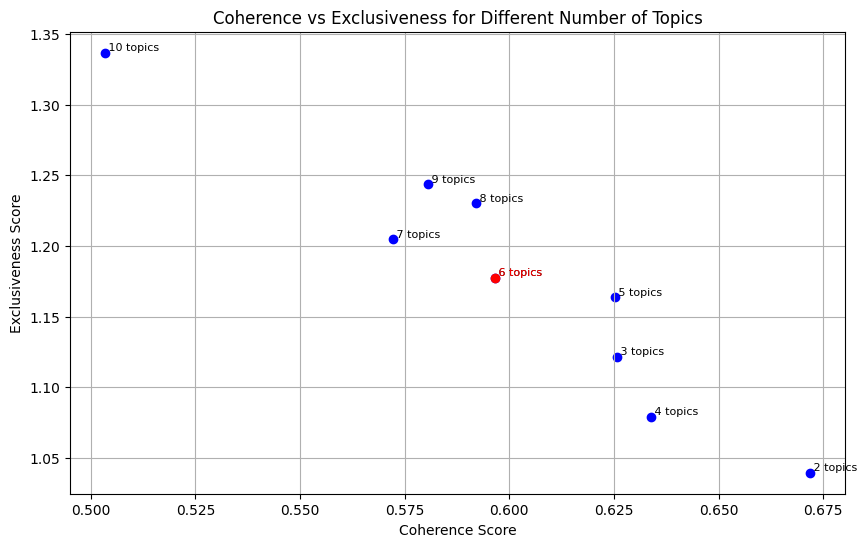

In [ ]:
# Determine the optimal number of topics
# Apply the preprocessing to the 'text' column
text = newdf['text'].apply(lambda x: x.split())

# Create a dictionary representation of the text
dictionary = gensim.corpora.Dictionary(text)

# Filter out words that occur in less than 20 entries, or more than 50% of the entries
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Convert the dictionary into a bag-of-words format
bow_corpus = [dictionary.doc2bow(i) for i in text]

# Calculate coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=text, start=2, limit=11, step=1)

# Calculate exclusiveness score
def calculate_exclusivity(model, num_topics):
    topic_word_matrix = []
    for topic_id in range(num_topics):
        topic_word_prob = model.show_topic(topic_id, topn=model.num_terms)
        topic_word_matrix.append([prob for word, prob in topic_word_prob])

    topic_word_matrix = np.array(topic_word_matrix)
    max_topic_per_word = np.max(topic_word_matrix, axis=0)
    exclusivity_score = np.sum(max_topic_per_word)

    return exclusivity_score

exclusivity_scores = [calculate_exclusivity(model, i) for i, model in enumerate(model_list, start=2)]

# Topics range
x = range(2, 11, 1)

# Create a scatter plot of Coherence vs Exclusivity with solid dots and labels
plt.figure(figsize=(10, 6))

# Plot each point with a label
for i, num_topics in enumerate(x):
    plt.scatter(coherence_values[i], exclusivity_scores[i], color='blue')
    plt.text(coherence_values[i], exclusivity_scores[i], f' {num_topics} topics', va='bottom', fontsize=8)

# Highlight the point with 6 topics
plt.scatter(coherence_values[4], exclusivity_scores[4], color='red')
plt.text(coherence_values[4], exclusivity_scores[4], ' 6 topics', va='bottom', fontsize=8, color='red')

# Add labels and title
plt.xlabel('Coherence Score')
plt.ylabel('Exclusiveness Score')
plt.title('Coherence vs Exclusiveness for Different Number of Topics')

# Show the plot
plt.grid()
plt.show()

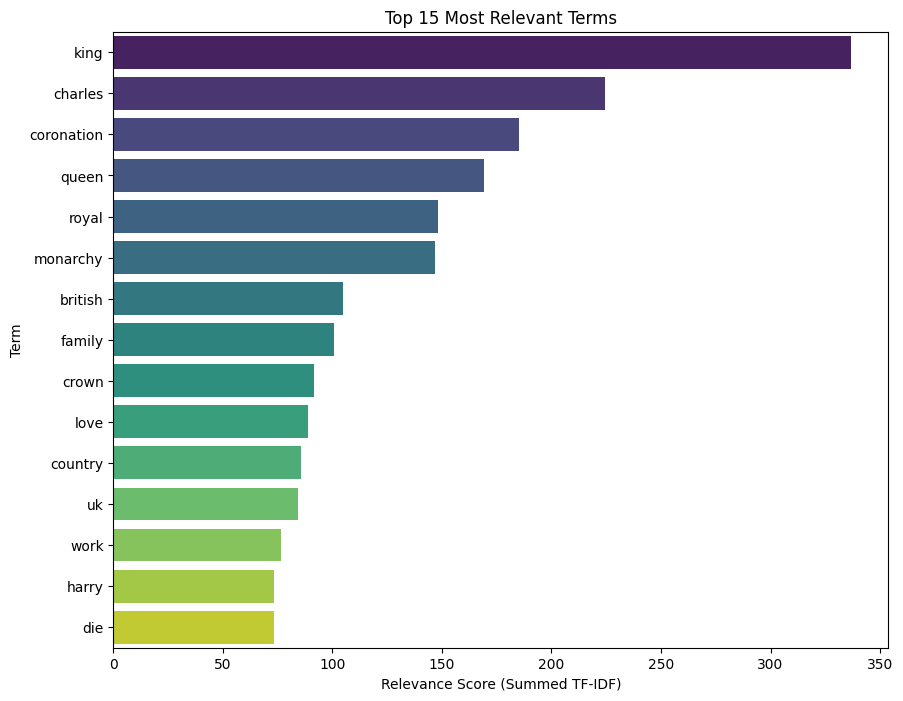

In [ ]:
# Manually define a basic list of stop words and extend it
stop_words = {
    "ourselves", "hers", "between", "yourself", "but", "again", "there", "about", "once",
    "during", "out", "very", "having", "with", "they", "own", "an", "be", "some", "for",
    "do", "its", "yours", "such", "into", "of", "most", "itself", "other", "off", "is",
    "s", "am", "or", "who", "as", "from", "him", "each", "the", "themselves", "until",
    "below", "are", "we", "these", "your", "his", "through", "don", "nor", "me", "were",
    "her", "more", "himself", "this", "down", "should", "our", "their", "while", "above",
    "both", "up", "to", "ours", "had", "she", "all", "no", "when", "at", "any", "before",
    "them", "same", "and", "been", "have", "in", "will", "on", "does", "yourselves","name",
    "then", "that", "because", "what", "over", "why", "so", "can", "did", "not", "now",
    "under", "he", "you", "herself", "has", "just", "where", "too", "only", "myself","youre",
    "which", "those", "i", "after", "few", "whom", "being", "if", "theirs", "my","long","iii",
    "against", "a", "by", "doing", "it", "how", "further", "was", "here", "than","first",
    "time", "day", "way", "said", "say", "going", "right", "good", "things", "lot","mean",
    "make", "see", "got", "well", "something", "come", "back", "take", "year", "years",
    "new", "old", "thing", "sure", "bit", "maybe", "need", "actually", "probably","isnt",
    "seems", "feel", "around", "every", "always", "little", "even", "still", "much","doesnt",
    "never", "point", "us", "might", "people", "get", "go", "one", "would", "could","shit","call",
    "also", "use", "yes", "big", "lol", "fuck", "live", "show", "many", "look", "like","gif","didn",
    "dont", "im", "thats", "want", "think", "know", "really", "watch", "give", "didnt", "cant"
}

# Convert the extended stop words set to a list
stop_words_list = list(stop_words)

# Re-initialize the TF-IDF vectorizer with the updated stop words list
vectorizer = TfidfVectorizer(stop_words=stop_words_list, max_features=10000)

# Fit the vectorizer and transform the 'text' column
tfidf_matrix = vectorizer.fit_transform(df4['text'].astype('str'))

# Sum the TF-IDF scores for each term to get their relevance across all documents
term_scores = tfidf_matrix.sum(axis=0)
term_scores_dict = {term: term_scores[0, idx] for term, idx in vectorizer.vocabulary_.items()}

# Extract the top 30 most relevant terms based on their summed TF-IDF scores
top_relevant_terms = sorted(term_scores_dict.items(), key=lambda x: x[1], reverse=True)[:15]

# Plot the top relevant terms as a horizontal bar plot
plt.figure(figsize=(10, 8))
terms, scores = zip(*top_relevant_terms)
sns.barplot(x=list(scores), y=list(terms), palette="viridis", orient="h")
plt.title("Top 15 Most Relevant Terms")
plt.xlabel("Relevance Score (Summed TF-IDF)")
plt.ylabel("Term")
plt.show()



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Applying the clean_text_nltk function to the 'text' column
newdf['text'] = newdf['text'].apply(clean_text_nltk)
newdf.head()

,date,id,text,type,subreddit,polarity,sentiment,royal_mention
0,2023-01-22,autotldr,best tldr originalhttpswwwreuterscomarticleb...,comment,worldnews,0.3400,Positive,Charles
1,2023-06-05,PPvsFC_,tf wale,comment,RoyalsGossip2,0.0000,Neutral,Others
2,2022-09-09,BitterPuddin,u admire british monarchy least lifetime quee...,comment,worldnews,0.9118,Positive,Queen
3,2023-06-05,IndigoButterfl6,entirely disagree monarchy arent denmark queen...,comment,popculturechat,0.3401,Positive,Queen
4,2023-05-05,DocJawbone,miss generally uncharitable towards monar...,comment,canada,0.7783,Positive,Charles


In [ ]:
# Number of topics
n_topics = 6

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Vectorize the text data
X = vectorizer.fit_transform(newdf['text'])

# Initialize LDA
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

# Fit LDA to the data
lda.fit(X)

# Get feature names for visualization later
feature_names = vectorizer.get_feature_names_out()

# Get topic proportions
topic_proportions = lda.transform(X).mean(axis=0)

In [ ]:
# Number of top words for each topic
n_top_words = 5

# Function to print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(message)
    return top_words

# Print top words and save them for visualization
top_words = print_top_words(lda, feature_names, n_top_words)

Topic #0: money crown royal oh man
Topic #1: king charles coronation love god
Topic #2: royal monarchy family country uk
Topic #3: queen king die try pretty
Topic #4: play imagine bad absolutely finger
Topic #5: harry theyre american invite let


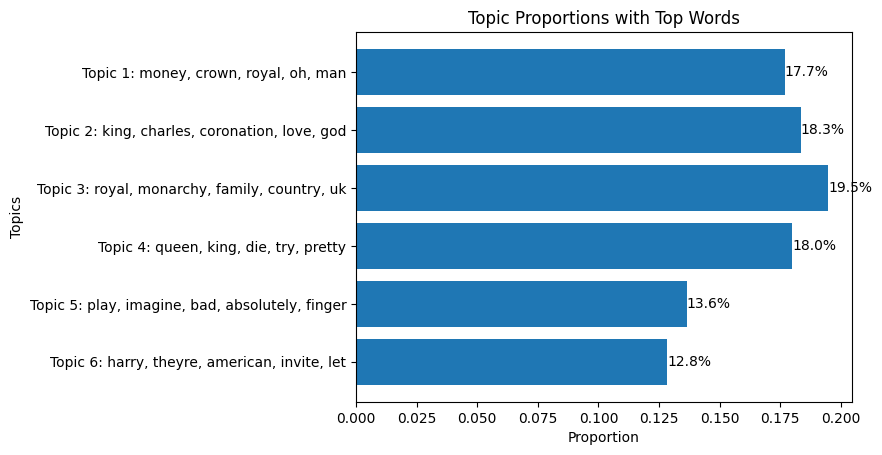

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined the variables n_topics, topic_proportions, and top_words

# Create figure and axis
fig, ax = plt.subplots()

# Arrange the data
topics = np.arange(n_topics) + 1  # Adjust topic indices to start from 1
proportions = topic_proportions

# Create horizontal bar plot
bars = ax.barh(topics, proportions)

# Add labels and title
ax.set_xlabel('Proportion')
ax.set_ylabel('Topics')
ax.set_title('Topic Proportions with Top Words')
ax.set_yticks(topics)
ax.set_yticklabels([f"Topic {i+1}: {', '.join(top_words[i])}" for i in range(n_topics)])

# Reverse the order of the y-axis to have Topic 1 at the top
ax.invert_yaxis()

# Add the proportion text next to each bar
for i, bar in enumerate(bars):
    proportion = proportions[i]
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{proportion:.1%}',
            ha='left', va='center')

# Show the plot
plt.show()


In [ ]:
# Generate word clouds of 6 topics
from wordcloud import WordCloud

In [ ]:
# Number of top words for each topic
n_top_words = 30

# Function to print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    topp_words = {}
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        topp_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(message)
    return topp_words

# Print top words and save them for visualization
topp_words = print_top_words(lda, feature_names, n_top_words)

Topic #0: money crown royal oh man wear monarch kind rule government vote kid today walk event family help allow quite dress respect wonder wealth choose high trump bring course democracy work
Topic #1: king charles coronation love god believe place monarchy comment president hand hold attend power ceremony stuff save british protest party crown cost irish london holy fan pm world best perform
Topic #2: royal monarchy family country uk british state pay work care tax yeah head ask guy guess understand na talk public britain job person start ago gon idea leave government world
Topic #3: queen king die try pretty great prince history wait england william ive sound word wasnt post child elizabeth read george camilla remember english war german news leave hard hear hell
Topic #4: play imagine bad absolutely finger id shes trump friend funny whats thank fly face eye meet hour sit joke bet mind real hed facewithtearsofjoy middle song change glad hilarious stick
Topic #5: harry theyre america

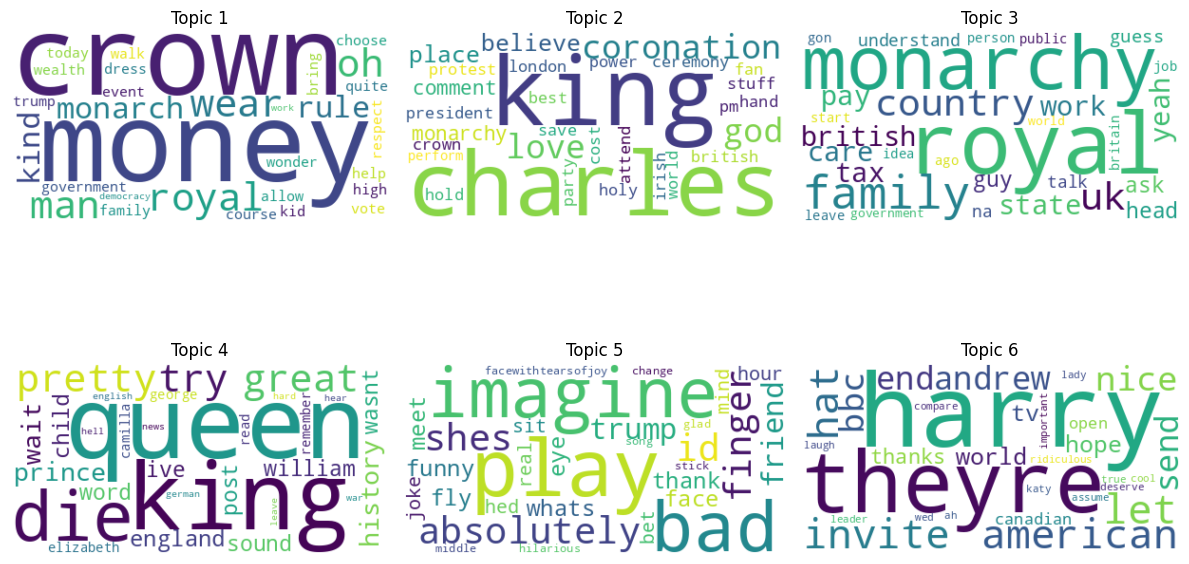

In [ ]:
# Function to create a word cloud for a given topic's top words
def create_wordcloud(topic_words, topic_index):
    wordcloud = WordCloud(background_color='white', max_words=50, colormap='viridis').generate(' '.join(topic_words))
    plt.subplot(2, 3, topic_index)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_index}")
    plt.axis('off')

# Create a 2x3 grid for word clouds
fig = plt.figure(figsize=(12, 8))

# Loop through each topic and create word clouds
for i in range(n_topics):
    create_wordcloud(topp_words[i], i+1)

plt.tight_layout()
plt.show()

In [1]:
!git clone https://github.com/elsieyuu/DS-2023-graduation-project.git

Cloning into 'DS-2023-graduation-project'...


In [2]:
%cd DS-2023-graduation-project

/content/DS-2023-graduation-project


In [4]:
!git config --global user.email "yuelsie1002@gmail.com"
!git config --global user.name "elsieyuu"

In [7]:
!!cp /content/Copy of Elsie Yu reddit analysis.ipynb /content/DS-2023-graduation-project/

["cp: cannot stat '/content/Copy': No such file or directory",
 "cp: cannot stat 'of': No such file or directory",
 "cp: cannot stat 'Elsie': No such file or directory",
 "cp: cannot stat 'Yu': No such file or directory",
 "cp: cannot stat 'reddit': No such file or directory",
 "cp: cannot stat 'analysis.ipynb': No such file or directory"]